In [1]:
%matplotlib widget
import os
import numpy as np
from scipy import linalg, spatial, fft, signal
from sklearn.experimental import enable_iterative_imputer
from sklearn import metrics, decomposition, impute
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon, Rectangle
from PIL import Image, ExifTags, ImageFile
import visualize as vis
import CR_search as cr
import preprocessing as pp
import calculate as cc
from read_WDF_class import WDF

ImageFile.LOAD_TRUNCATED_IMAGES = True

folder = os.path.expanduser("~/Documents/RamanData/")
subfolder = "frejus21"
files = os.listdir(os.path.join(folder,subfolder))

for i, tf in enumerate(files):
    if tf[-3:] == 'wdf':
        print(i, ') ', tf)  

0 )  exampleM1.wdf
1 )  exampleA1.wdf
2 )  exampleM2.wdf
3 )  exampleM3.wdf
4 )  exampleA2.wdf
6 )  exampleM4.wdf


In [2]:
file = files[1]
filename = os.path.join(folder,subfolder,file)

fff = WDF(filename, verbose=True)

Reading the file: "exampleA1.wdf"


================================= Block : WDF1 =================================
size: 512, offset: 0
WdfFlag--------------------------------- : 	WdfXYXY
PointsPerSpectrum----------------------- : 	1015
Capacity-------------------------------- : 	2006
Count----------------------------------- : 	2006
AccumulationCount----------------------- : 	1
YlistLength----------------------------- : 	1
XlistLength----------------------------- : 	1015
DataOriginCount------------------------- : 	9
ApplicationName------------------------- : 	WiRE
ApplicationVersion---------------------- : 	5.3.0 build 16195
ScanType-------------------------------- : 	StreamLineHR
MeasurementType------------------------- : 	Map
StartTime------------------------------- : 	Mon Jun 21 08:06:02 2021
EndTime--------------------------------- : 	Mon Jun 21 12:35:25 2021
SpectralUnits--------------------------- : 	Counts
LaserWaveLength------------------------- : 	532.06
Title---------------

In [3]:
show1 = vis.ShowSelected(fff)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [5]:
show1.fig.set_figwidth(12)
show1.fig.set_figheight(10)

In [4]:
def check_res(fff):
    ss = np.abs(fff.map_params["StepSizes"][1])
    assert np.isclose(fff.yres*fff.ysizepx/ss, fff.map_params["NbSteps"][1],
                      atol=ss/2), "Problem with the img Y resolution"
    ss = np.abs(fff.map_params["StepSizes"][0])
    assert np.isclose(fff.xres*fff.xsizepx/ss, fff.map_params["NbSteps"][0],
                      atol=ss/2), "Problem with the img X resolution"

In [ ]:
check_res(fff)

In [5]:
fff.img_exif

{'FocalPlaneXYOrigins': (-9818.9, -5364.7),
 'FieldOfViewXY': (4072.2, 2599.3),
 'px/µ ?': 1.0,
 'ExifOffset': 114,
 'ImageDescription': 'white-light image',
 'Make': 'Renishaw',
 'FocalPlaneResolutionUnit': 'Micron',
 'FocalPlaneXResolution': 4072.2,
 'FocalPlaneYResolution': 2599.3}

<IPython.core.display.Javascript object>


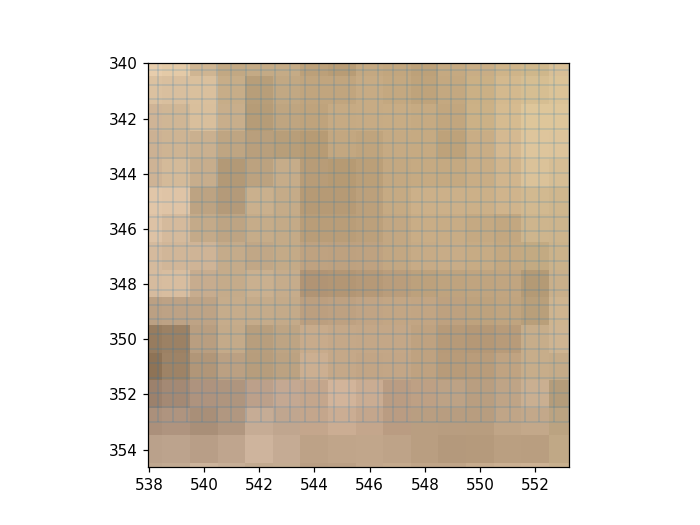

In [6]:
fff.show_grid()

In [ ]:
fff.map_params

{'MapAreaType': 'StreamLine',
 'InitialCoordinates': array([-9659.71, -3301.61,   -16.  ], dtype=float32),
 'StepSizes': array([ 3.1, -3.1,  1. ], dtype=float32),
 'NbSteps': array([1000,  599,    1], dtype=uint32),
 'LineFocusSize': 0}

In [ ]:
fff.img_exif

{'FocalPlaneXYOrigins': (-9818.9, -5364.7),
 'FieldOfViewXY': (4072.2, 2599.3),
 'px/µ ?': 1.0,
 'ExifOffset': 114,
 'ImageDescription': 'white-light image',
 'Make': 'Renishaw',
 'FocalPlaneResolutionUnit': 'Micron',
 'FocalPlaneXResolution': 4072.2,
 'FocalPlaneYResolution': 2599.3}

In [ ]:
fff.xsizepx, fff.xminpx, fff.xmaxpx, np.size(fff.img_arr, 1)

(532, 27, 558, 697)

In [ ]:
plt.figure()
plt.imshow(fff.img_arr)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
fff.img_reduced.shape

(104, 38, 3)

In [ ]:
fff.n_y, fff.n_x

(599, 1000)

In [ ]:
(fff.yminpx, fff.ymaxpx), (fff.xminpx, fff.xmaxpx), fff.img_arr.shape

((35, 353), (27, 558), (445, 697, 3))

In [ ]:
fff.img_reduced.shape

(105, 207, 3)

In [ ]:
fff.xsizepx, fff.xminpx, fff.xmaxpx

(531, 27, 558)

<IPython.core.display.Javascript object>


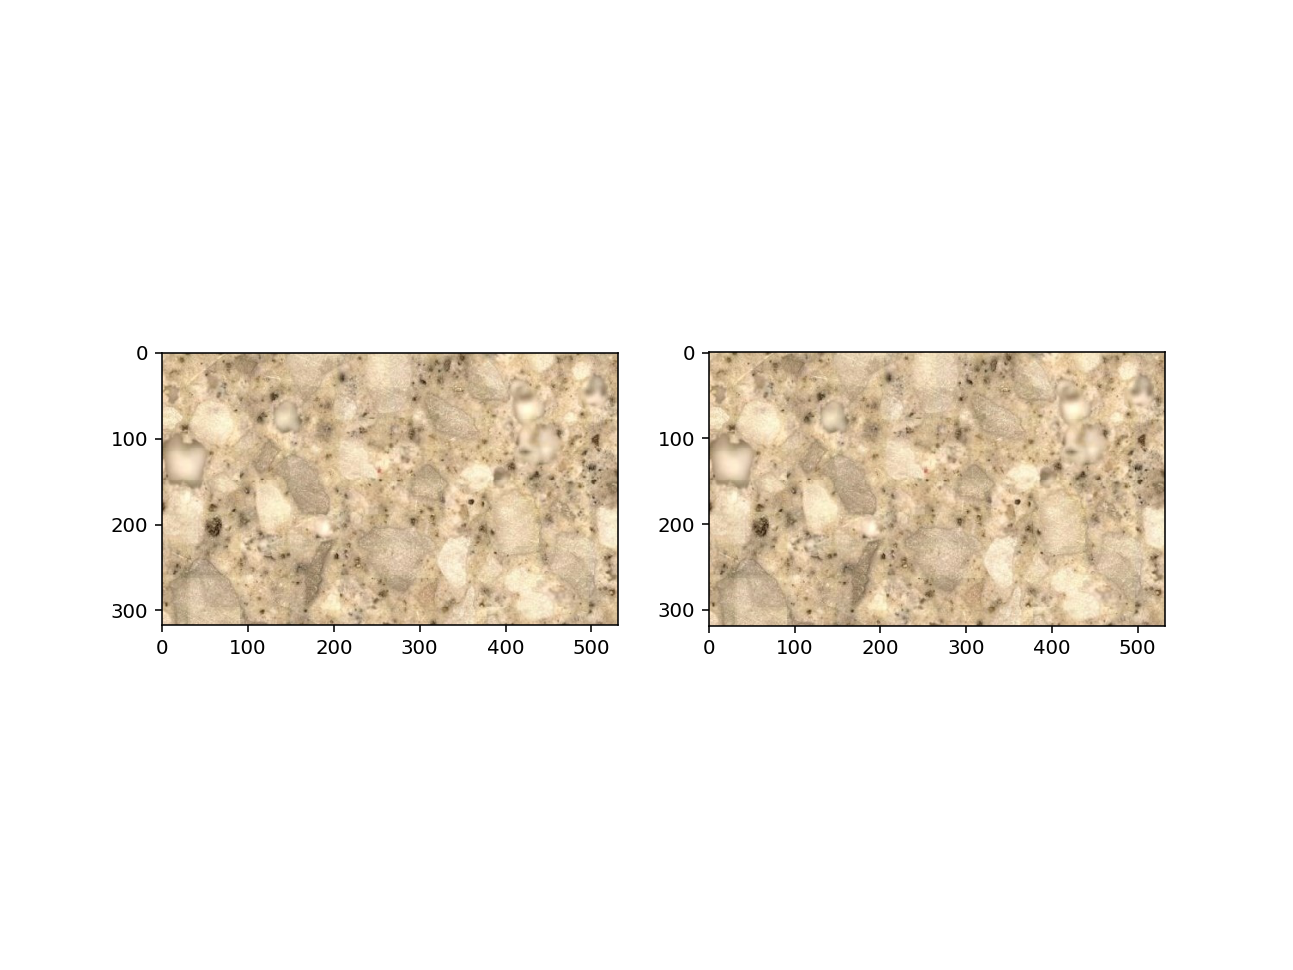

In [18]:
plt.close('all')
fig, (ax1, ax_org) = plt.subplots(ncols=2)
ax1.imshow(fff.img_reduced)
ax_org.imshow(fff.img_arr[fff.yminpx:fff.ymaxpx+1,fff.xminpx:fff.xmaxpx+1,:])


In [19]:
trta = vis.ShowSelected(np.hstack((fff.img_reduced.reshape(-1, 3)/np.median(fff.img_reduced)*np.median(fff.spectra[:,:10]), fff.spectra)).reshape(fff.n_y, fff.n_x, -1));

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 168858 and the array at index 1 has size 599000

In [22]:
blocks = list(zip(fff.block_names, fff.b_off, fff.block_sizes))
blocks.sort(key=lambda y: y[1])
for n,o,s in blocks:
    print(f"{n} : {o:>12d} -> {s:>12d}")

WDF1 :            0 ->          512
DATA :          512 ->   2431940016
YLST :   2431940528 ->           28
XLST :   2431940556 ->         4084
WXDA :   2431944640 ->         2605
ORGN :   2431947245 ->     28752164
TEXT :   2460699409 ->          106
SURF :   2460699515 ->     11474120
WXDM :   2472173635 ->       334072
WHTL :   2472507707 ->       103244
WMAP :   2472610951 ->           64
BKXL :   2472611015 ->         4100
WXCS :   2472615115 ->        10897
WXIS :   2472626012 ->         3939
ZLDC :   2472629951 ->          314
WMSK :   2472630265 ->          290


In [23]:
fff.origins

,X (Micron),Y (Micron),Z (Micron),Time (FileTime),Flags (Arbitrary),Checksum (Arbitrary)
0,-9659.71,-5155.41,0.36,1.325986e+17,0.0,0.0
1,-9656.61,-5155.41,0.32,1.325986e+17,0.0,0.0
2,-9653.51,-5155.41,0.27,1.325986e+17,0.0,0.0
3,-9650.41,-5155.41,0.23,1.325986e+17,0.0,0.0
4,-9647.31,-5155.41,0.18,1.325986e+17,0.0,0.0
...,...,...,...,...,...,...
598995,-6575.21,-3301.61,-4.32,1.325989e+17,0.0,0.0
598996,-6572.11,-3301.61,-4.34,1.325989e+17,0.0,0.0
598997,-6569.01,-3301.61,-4.36,1.325989e+17,0.0,0.0
598998,-6565.91,-3301.61,-4.38,1.325989e+17,0.0,0.0


In [24]:
fff.origins["X (Micron)"].to_numpy().shape

(599000,)

In [26]:
fff.origins.columns

Index(['X (Micron)', 'Y (Micron)', 'Z (Micron)', 'Time (FileTime)',
       'Flags (Arbitrary)', 'Checksum (Arbitrary)'],
      dtype='object')

<IPython.core.display.Javascript object>


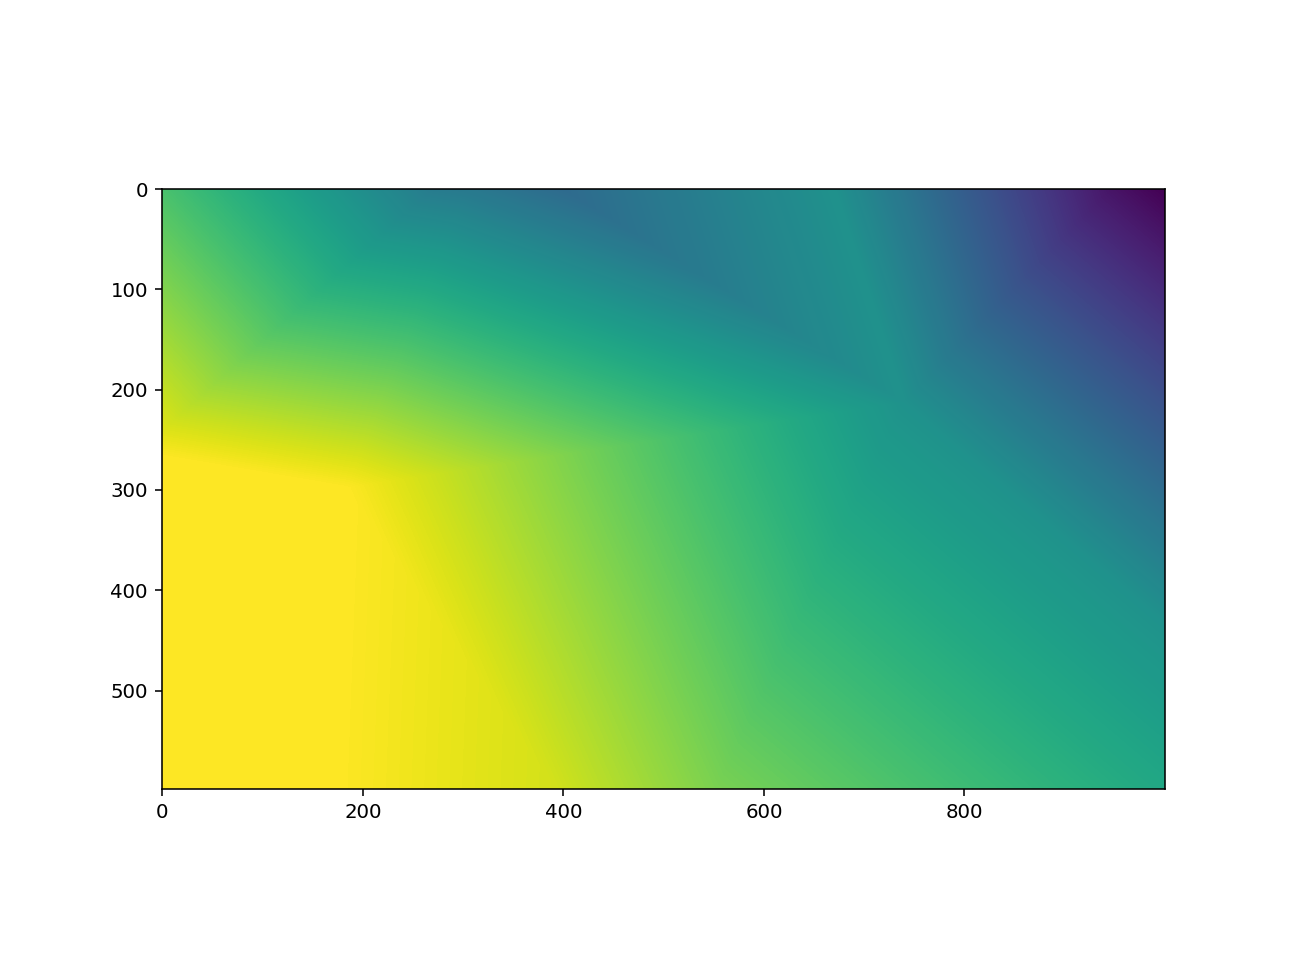

In [27]:
plt.figure()
plt.imshow(fff.origins["Z (Micron)"].to_numpy().reshape(fff.n_y, fff.n_x))

In [28]:
dd = np.arange(1,5)
all_phi = [xx for d in dd for xx in np.arange(np.pi/(3*d), 2*np.pi, np.pi/(3*d))]

for xx in all_phi:
    print(np.round(np.round((3*xx/np.pi), 2)%1, 2)>0)

n = 2*np.sqrt(2)
centri = [(2*d*np.cos(phi_i), 2*d*np.sin(phi_i)) for d in dd for phi_i in np.arange(0, 2*np.pi, np.pi/(3*d))]

False
False
False
False
False
False
True
False
True
False
True
False
True
False
True
False
True
True
True
False
True
True
False
True
True
False
True
True
False
True
True
False
True
True
True
True
True
False
True
True
True
False
True
True
True
False
True
True
True
False
True
True
True
False
True
True
True
False


<IPython.core.display.Javascript object>


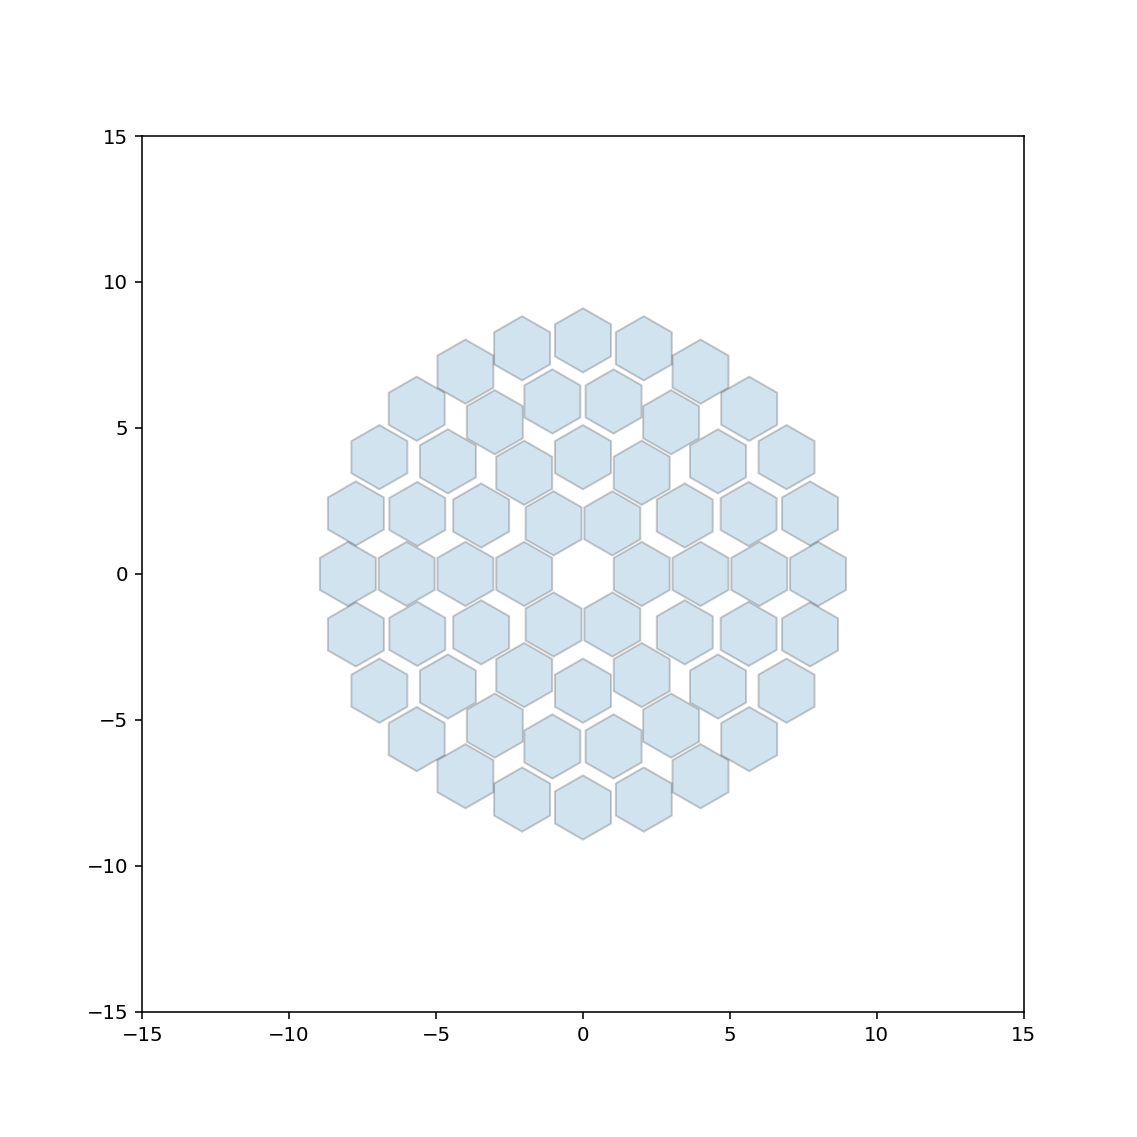

In [29]:
plt.close('all')

fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim(left=-15, right=15)
ax.set_ylim(bottom=-15, top=15)
for x, y in centri:
    hex = RegularPolygon((x, y), numVertices=6, radius=1.1, alpha=0.2,
                         orientation=np.radians(60), edgecolor='k')
    ax.add_patch(hex)
    # Also add a text label
#     ax.text(x, y+0.2, l[0], ha='center', va='center', size=20)

# Also add scatter points in hexagon centres
# ax.scatter(hcoord, vcoord, c=[c[0].lower() for c in colors], alpha=0.5)

<IPython.core.display.Javascript object>


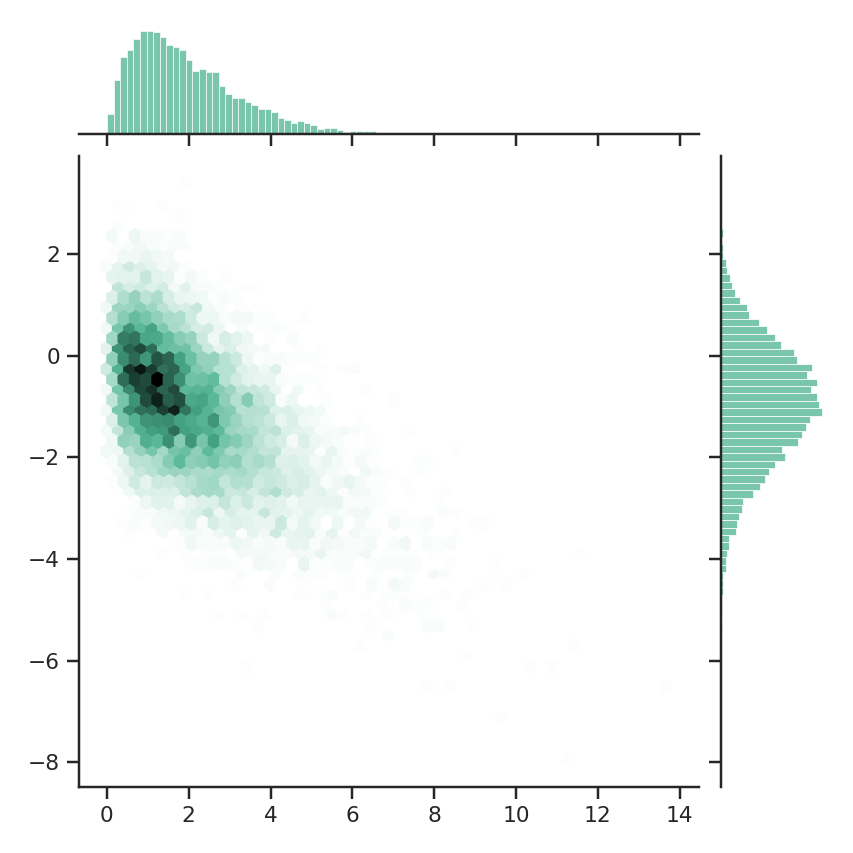

In [30]:
import numpy as np
import seaborn as sns
sns.set_theme(style="ticks")

rs = np.random.RandomState(11)
x = rs.gamma(2, size=10000)
y = -.5 * x + rs.normal(size=10000)

sns.jointplot(x=x, y=y, kind="hex", color="#4CB391")


In [ ]:
list(zip(fff.block_names, fff.b_off, fff.block_sizes))

[('WDF1', 0, 512),
 ('DATA', 512, 5521616),
 ('YLST', 5522128, 28),
 ('XLST', 5522156, 4084),
 ('WXDA', 5526240, 2605),
 ('ORGN', 5528845, 65444),
 ('TEXT', 5594289, 106),
 ('SURF', 5594395, 46192514),
 ('WXDM', 51786909, 498448),
 ('WHTL', 52285357, 267676),
 ('WMAP', 52553033, 64),
 ('BKXL', 52553097, 4100),
 ('WXCS', 52557197, 10897),
 ('WXIS', 52568094, 3933),
 ('ZLDC', 52572027, 314),
 ('WMSK', 52572341, 290)]

<IPython.core.display.Javascript object>


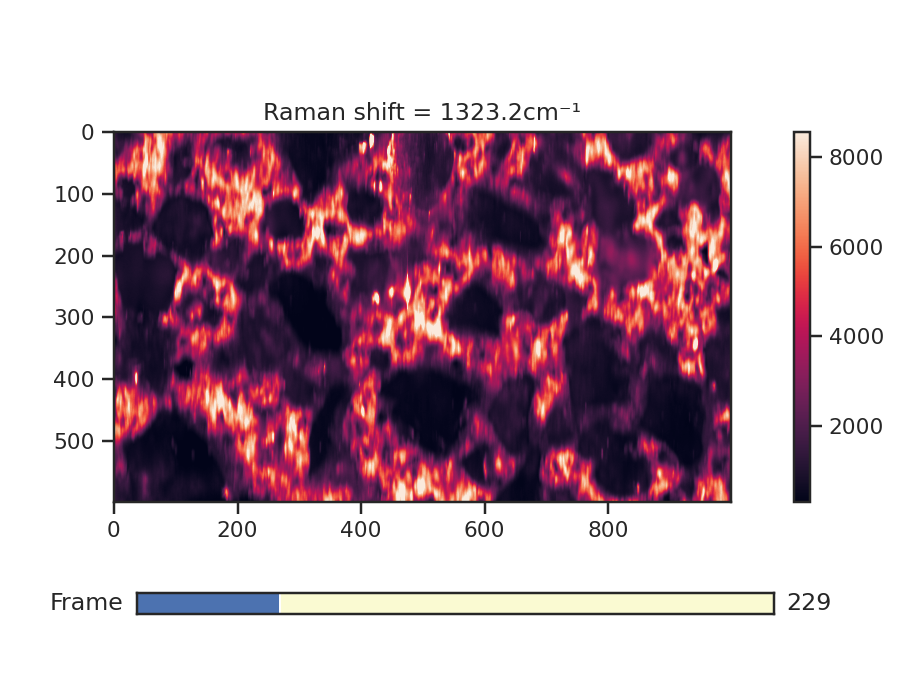

In [31]:
vis.AllMaps(fff);

<IPython.core.display.Javascript object>


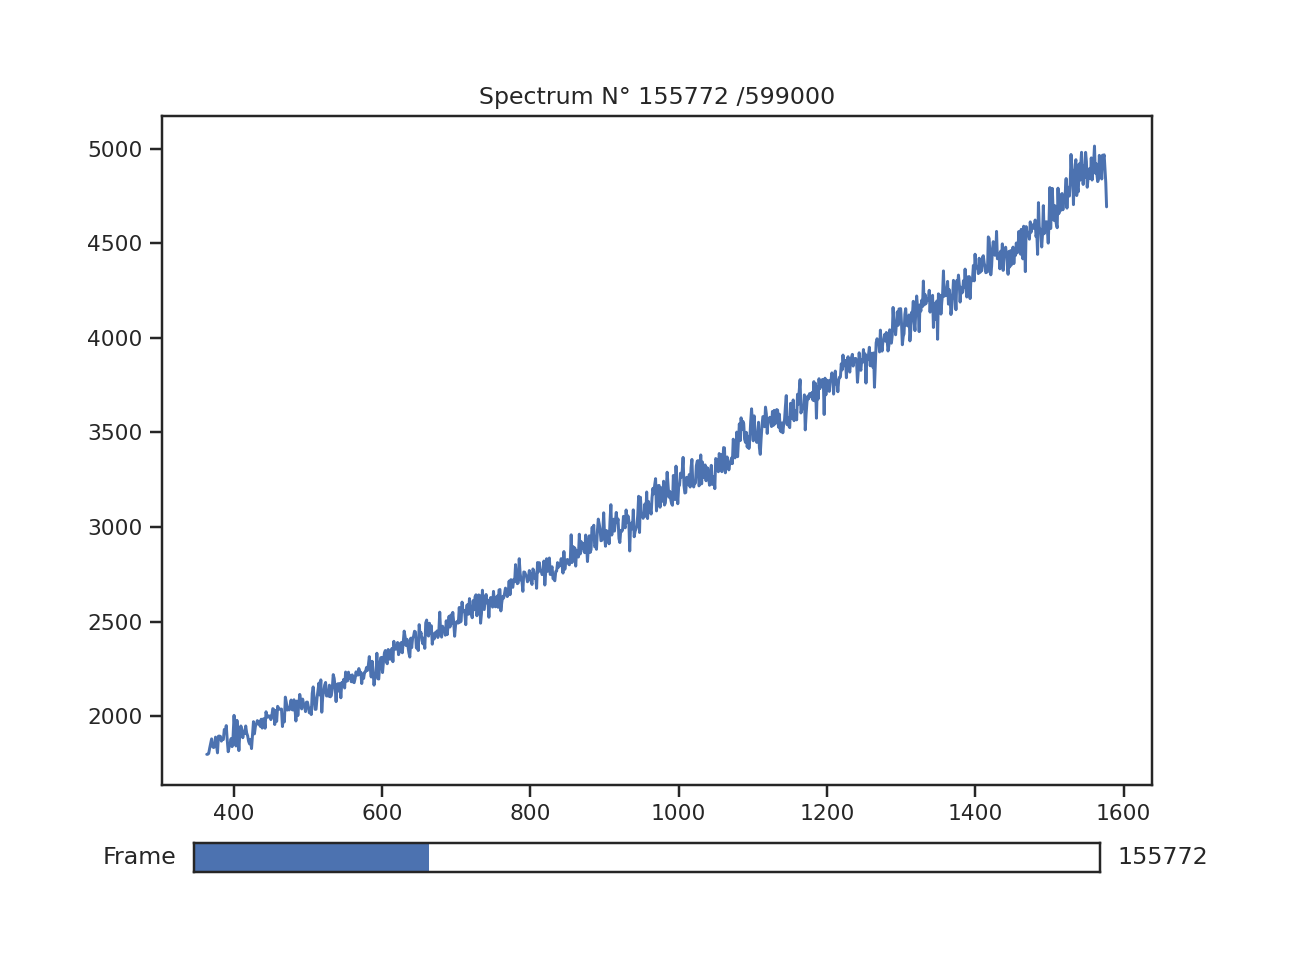

In [32]:
vis.ShowSpectra(fff);

In [ ]:
xlabel, ylabel = fff.map_params["StepSizes"][fff.map_params["StepSizes"] > 0]

array([1.e+03, 5.e-01], dtype=float32)

<IPython.core.display.Javascript object>


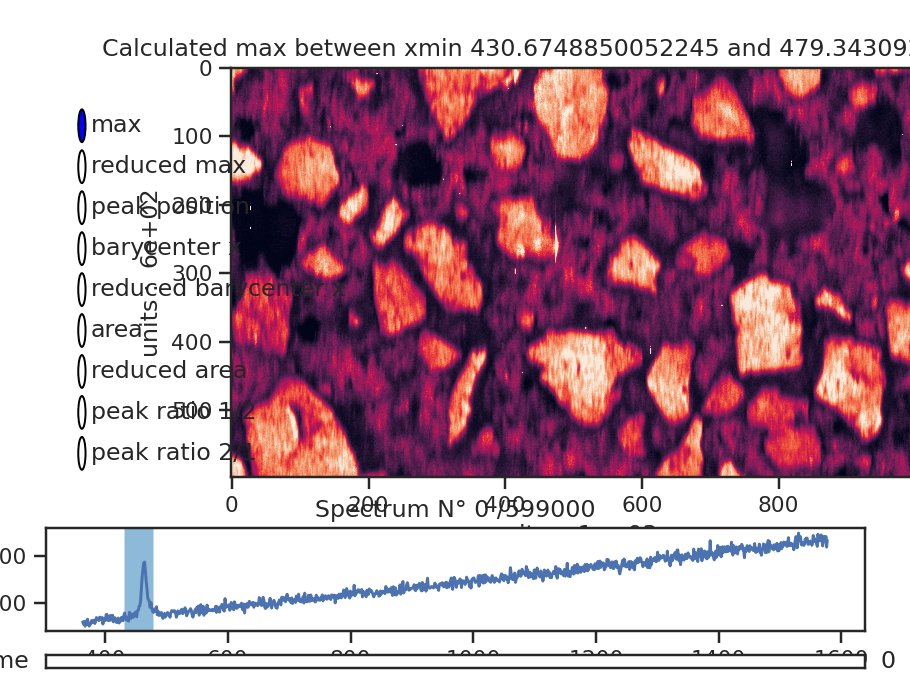

In [33]:
vis.ShowSelected(fff);

In [35]:
spectra = pp.correct_saturated(fff.spectra, (ny, nx),
                               n_nearest_features=10, max_iter=64,
                               smoothen=True, lam=5, copy=True)

NameError: name 'ny' is not defined

In [ ]:
spectra[1853,444:452] = 50
spectra[2914, 880:885] = 55
spectra[1936, 193:199] = 65
spectra[2241, 862:866] = 65
spectra[2231, 177:182] = 65
spectra[2657, 203:208] = 65
spectra[1637, 290:295] = 80
spectra[918, 797:802] = 65
spectra[1510, 341:353] = 68

In [37]:
baseline = cc.baseline_als(fff.spectra[:,120:], lam=80000)
# baseline -= np.min(baseline, axis=-1, keepdims=True)

spectra = spectra[:, 120:]

x_values = x_values[108:]

  1%|▋                                                                               | 5128/599000 [00:16<30:54, 320.32it/s]

KeyboardInterrupt: 

In [ ]:
bl = vis.AllMaps(np.log(1+baseline.reshape(ny, nx, -1)), x_values);

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
vis.ShowSpectra(spectra-baseline, sigma=x_values)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Cosmic Rays search 

In [ ]:
# spectra -= cc.baseline_als(spectra, lam=200)
spectra -= np.min(spectra, axis=-1, keepdims=True)
spectra2 = (spectra - baseline) / \
            np.median(spectra - baseline, axis=-1, keepdims=True)
sisa = (np.max(spectra2, axis=0)-2*np.percentile(spectra2, 99, axis=0)
        +np.median(spectra2, axis=0))/np.median(spectra2, axis=0)
st_dev = np.std(sisa)

suspicious_positions = np.where(sisa > 2*st_dev)[0]
condition = spectra2.T[suspicious_positions] > 10*np.median(spectra2, axis=-1, keepdims=True)[suspicious_positions]
uslov = np.nonzero(condition)
suspects = np.unique([uslov[1][x] for x, y in itertools.groupby(uslov[0]) if len(list(y))<=np.ceil(len(uslov[0])/100)])
zez = vis.ShowSpectra(spectra2[suspects]);

IndexError: arrays used as indices must be of integer (or boolean) type

In [ ]:
uslov

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
np.where(sisa > 2*st_dev)

(array([152, 153, 328, 416, 417, 418, 419, 420, 422]),)

In [ ]:
len(suspicious_positions), condition.shape, spectra.shape, sisa.shape

(27, (27, 4347), (4347, 1015), (1015,))

In [ ]:
np.where(sisa > 2*st_dev)

(array([ 33, 129, 169, 179, 180, 195, 196, 197, 198, 205, 206, 291, 292,
        293, 448, 582, 583, 799, 800, 863, 864, 865, 881, 882, 883, 884,
        922]),)

In [ ]:
uslov = np.nonzero(condition)

In [ ]:
uslov

(array([ 0,  1,  2,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  5,  6,  7,  8,  9,  9, 10, 10, 11, 11, 12, 13, 14, 15, 16, 17,
        18, 19]),
 array([  43,  494,  494, 1310,   37,  159,  479,  519,  600,  640,  681,
         759,  870,  896, 1101, 1103, 1141, 1143,  965,  965,  809,   44,
          44,  912,   44,  912,   44,  912,  119,    4,  608,  608, 1262,
         495,  329, 1146]))

In [ ]:
np.ce

array([  43.,  494.,  494., 1310.,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
        965.,  965.,  809.,   44.,   44.,  912.,   44.,  912.,   44.,
        912.,  119.,    4.,  608.,  608., 1262.,  495.,  329., 1146.])

In [ ]:
np.delete(suspicious_positions, 4)

array([ 12,  70,  71, 136, 314, 315, 348, 365, 366, 367, 368, 383, 389,
       590, 591, 630, 742, 745, 784])

In [ ]:
[uslov[1][x] for x, y in itertools.groupby(uslov[0]) if len(list(y))<=np.ceil(len(uslov[0])/100)]

[43,
 494,
 494,
 1310,
 159,
 479,
 519,
 600,
 870,
 896,
 1101,
 1103,
 1141,
 1143,
 965,
 965]

In [ ]:
import itertools
np.where(uslov[0] != 4, uslov[1], np.nan)

In [ ]:
vis.ShowSpectra(spectra2.T[suspicious_positions])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
vis.ShowSpectra(spectra.T[suspicious_positions])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Saturated & Zero spectra

In [38]:
plt.close("all")
trt = pp.find_saturated(rawspectra)
almostraw = pp.correct_zeros(rawspectra, copy=True)
sat_idx = np.where(almostraw==0)
almostraw[sat_idx] = np.nan
novica = np.zeros_like(almostraw)
novica[sat_idx] = spectra[sat_idx]
novica[novica==0] = np.nan
ss = np.stack((rawspectra[trt]-10000, spectra[trt], novica[trt]), axis=-1)
vis.ShowSpectra(ss, x_values, title=["Spectra N°"+str(x) for x in trt]);

NameError: name 'rawspectra' is not defined

In [ ]:
# =============================================================================
#                                     PCA...
# =============================================================================
npca = 50
pca = decomposition.PCA(n_components=npca)
pca_fit = pca.fit(spectra)

spectra_reduced = pca_fit.transform(spectra)
spectra_denoised = pca_fit.inverse_transform(spectra_reduced)

guz = pca.get_covariance()

In [ ]:
vis.AllMaps(spectra_reduced.reshape(ny, nx, -1), components=pca.components_, components_sigma=x_values)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
plt.figure()
plt.plot(guz[:,674])
# plt.plot(guz[:,179])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
plt.close('all')
plt.imshow(np.log(guz))
# plt.imshow(np.log(guz))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
plt.close('all')
plt.figure()
plt.plot(spectra[674])
plt.plot(rawspectra[674]);

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
plt.figure()
plt.plot(np.log(pca.explained_variance_ratio_), 'bo')
plt.plot(np.log(pca.explained_variance_), 'xg')


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
# =============================================================================
#                  showing the smoothed spectra
# =============================================================================
valid_idx = np.ones(npca, dtype=bool)
valid_idx[1] = 0
novica = pca.mean_ + np.dot(spectra_reduced[:, valid_idx], pca.components_[valid_idx])

In [ ]:
vis.AllMaps(novica.reshape(ny, nx, -1), sigma=x_values)

In [ ]:
vis.ShowSpectra(novica, sigma=x_values)

```Python
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from time import time

estimators = [
    BayesianRidge(),
    DecisionTreeRegressor(max_features='sqrt'),
    ExtraTreesRegressor(n_estimators=10),
    KNeighborsRegressor(n_neighbors=8)
]


zero_idx = pp.find_zeros(rawspectra)
rawspectra[zero_idx] = np.median(rawspectra, axis=0)

sat = pp.find_saturated(rawspectra)

saturated_idx = np.where(rawspectra==0)

# rawspectra[saturated_idx] = np.nan
rawspectra[saturated_idx] = np.nan

trt = pp.get_neighbourhood(sat, map_shape)
# create an array so that trt[vrackalica] = sat
vrackalica = np.array([np.argwhere(trt==i)[0][0] for i in sat])

krk = dict()
tajming = dict()
for jj, est in enumerate(estimators):
    imp = impute.IterativeImputer(n_nearest_features=8, max_iter=44, estimator=est)
    start = time()
    popravljeni = imp.fit_transform(rawspectra[trt].T).T[vrackalica]
    tajming[str(est)] = time()-start
    spectra = np.copy(rawspectra)
    spectra[sat] = popravljeni
    ss = np.stack((rawspectra[sat]-1000, spectra[sat]), axis=-1)
    krk[jj] = vis.ShowSpectra(ss, x_values, title=[str(x) for x in sat])
    krk[jj].fig.suptitle(str(est))
```

In [ ]:
# if smooth:
#     upeglani = cc.baseline_als(popravljeni, lam=len(x_values)//5, p=0.6)

#     is_changed = np.diff(saturated_idx[0], prepend=sat[0])!=0
#     renormalizovani = []
#     i = 0
#     for cond in is_changed:
#         if cond:
#             i+=1
#         renormalizovani.append(i)

#     novi = np.copy(saturated_idx)
#     novi[0] = np.array(renormalizovani)
#     novi = tuple(novi)


#     spectra[saturated_idx] = upeglani[novi]

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
np.meshgrid(np.arange(ny), np.arange(nx), indexing='ij')

[array([[ 0,  0,  0, ...,  0,  0,  0],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 2,  2,  2, ...,  2,  2,  2],
        ...,
        [60, 60, 60, ..., 60, 60, 60],
        [61, 61, 61, ..., 61, 61, 61],
        [62, 62, 62, ..., 62, 62, 62]]),
 array([[ 0,  1,  2, ..., 66, 67, 68],
        [ 0,  1,  2, ..., 66, 67, 68],
        [ 0,  1,  2, ..., 66, 67, 68],
        ...,
        [ 0,  1,  2, ..., 66, 67, 68],
        [ 0,  1,  2, ..., 66, 67, 68],
        [ 0,  1,  2, ..., 66, 67, 68]])]

In [ ]:
plt.figure()
plt.plot(spectra[595])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
ll = []
for i in ll:
    print("evo")

In [ ]:
def snail(snail_map):
    
    pass

In [ ]:
import numpy as np
array = np.array([[1,2,3],
                  [4,5,6],
                  [7,8,9]])

In [ ]:
neworder = np.empty(array.size).astype(int)
nrows, ncols = array.shape
counter = 0
i=0
while i < ncols:
    neworder[counter] = array[0, i]
    counter +=1
    i += 1
i=1
while i < nrows:
    neworder[counter] = array[i, ncols-1]
    counter +=1
    i += 1
i=1
while 
neworder
    

In [ ]:
neworder

array([1, 2, 3, 6, 9, 0, 0, 0, 0])

In [ ]:
4%3

1

In [ ]:
sort_array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

[1, 8, 3, 6, 5, 4, 7, 2, 9, 0]

In [ ]:
b.pop(3)

361

In [ ]:
7&1

1

In [ ]:
all([True, True, True])

True

In [ ]:
bb = []
for b in []:
    bb.append(b)

In [ ]:
[] in bb

False

In [ ]:
len(bb)

0

In [ ]:
b.sort()

In [ ]:
b

[121, 361, 361, 361, 14641, 20736, 20736, 25921]